# Visualizing Activations
**Jack Savage, Tyler Seppala, Kyle Burack, Greg Albarian, Will Crewe**


---

In [1]:
import os
import keras
import shutil
import random
import numpy as np
import pandas as pd
from keras import losses
from keras.callbacks import *
import matplotlib.pyplot as plt
from matplotlib import colors
from keract import get_activations
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

Using TensorFlow backend.


### TODO: Only load positive images xception correctly classifies


In [2]:
# image loading + preproccessing
datagen = ImageDataGenerator() ###### EDIT THIS LATER IF OVERFITTING BECOMES AN ISSUE

# certain hyperparameters
batch = 5

print("Loading test data...")
test_generator = datagen.flow_from_directory(
    directory= 'gci_data/test',
    target_size=(1024, 1024),
    color_mode="rgb",
    batch_size=batch,
    class_mode='categorical',
    shuffle=True,)

Loading test data...
Found 208 images belonging to 2 classes.


In [3]:
print("Loading model...")
model = load_model('trained_models/xception_model_1')
print("Compiling model...")
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics =['accuracy'])
print("Done")

Loading model...
Compiling model...
Done


### Retrieve activation maps

In [4]:
imagedir = 'gci_data/test/yes_pneumonia/'
images = os.listdir(imagedir)

image = load_img(imagedir+images[random.randint(0,len(images))])
image_array = np.array(image).reshape((1,1024,1024,3))
activation_map = get_activations(model,image_array)#['block1_conv1/convolution:0']

In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1024, 1024, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 511, 511, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 511, 511, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 511, 511, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

### Visualizing Convolutial Layers

In [9]:
# selecting layers to view (could be improved)

'''
Valid Keywords:
- conv
- Relu
'''

keyword = 'Relu' # edit this to change type of layers shown
layer_names = []

for key in activation_map.keys():
    if len(key.split('/'))>1:
        if key.split('/')[1].startswith(keyword):
            layer_names.append(key)    

C:\Users\jecks\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 31 + 1) instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jecks\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 63 + 1) instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jecks\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 127 + 1) instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jecks\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 255 + 1) instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jecks\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 727 + 1) inst

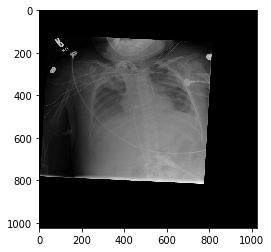

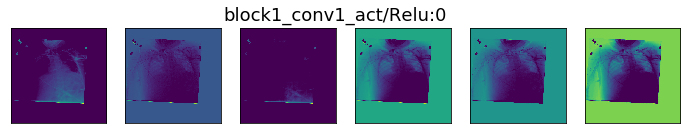

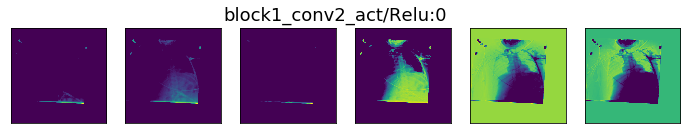

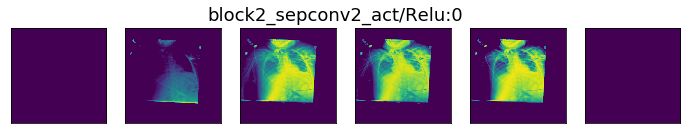

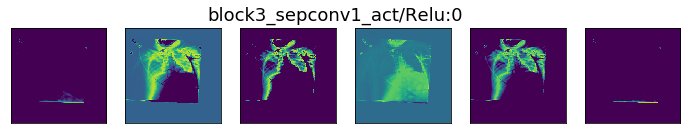

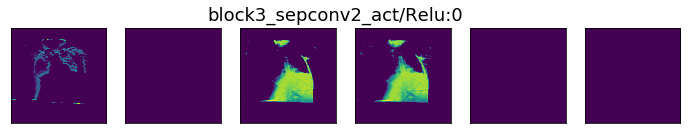

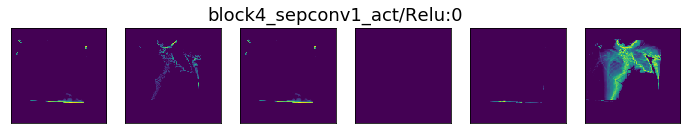

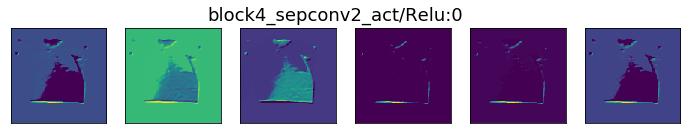

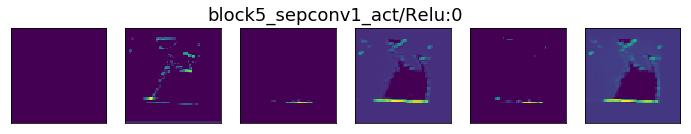

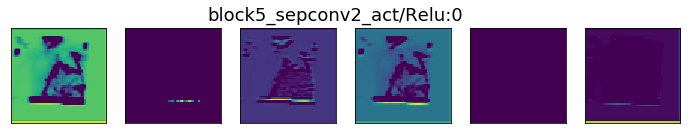

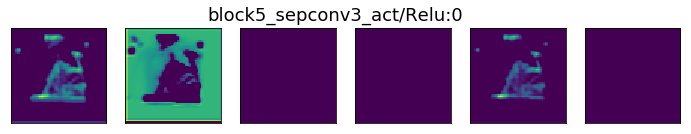

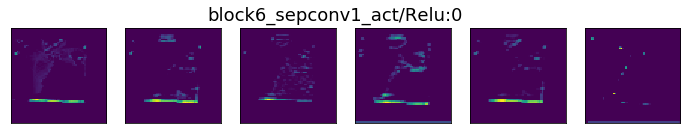

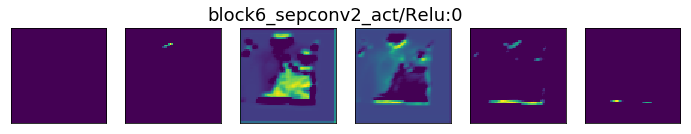

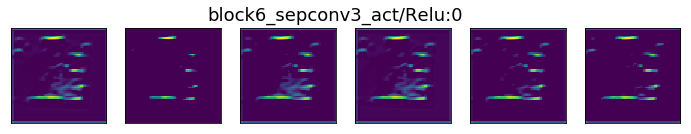

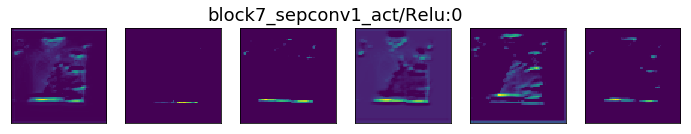

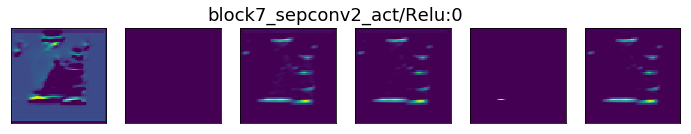

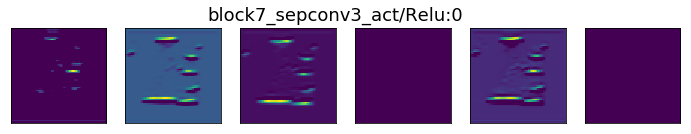

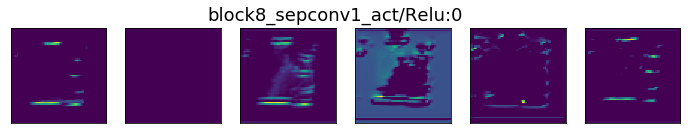

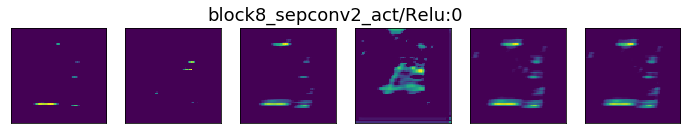

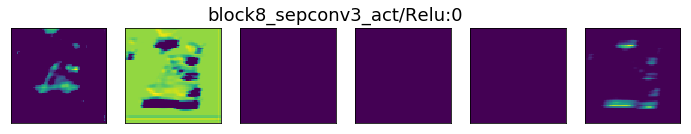

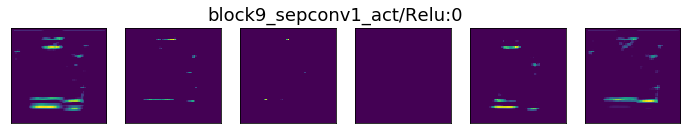

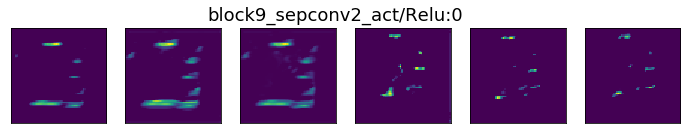

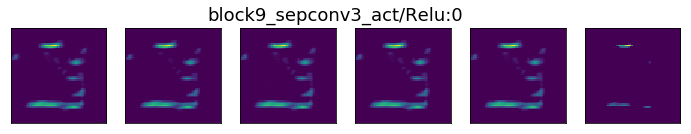

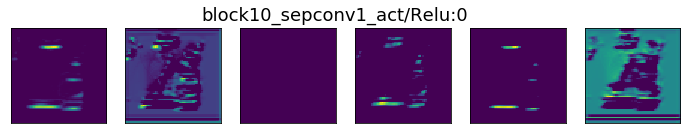

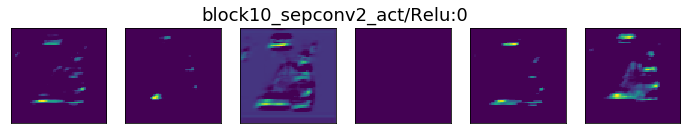

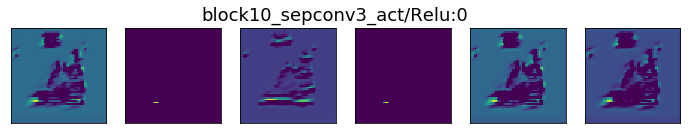

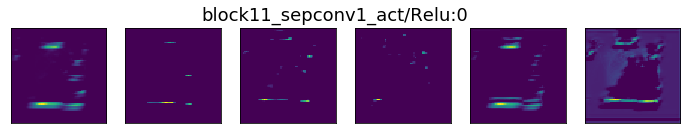

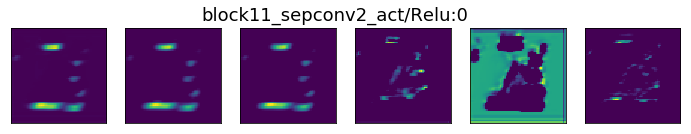

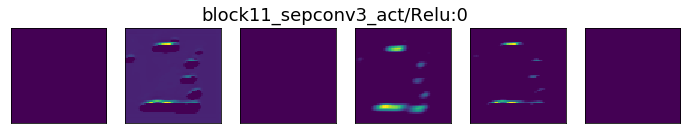

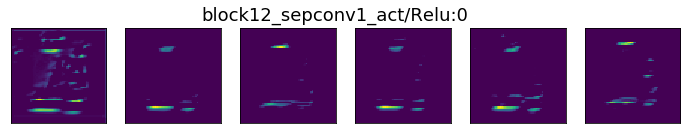

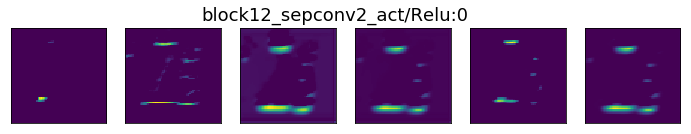

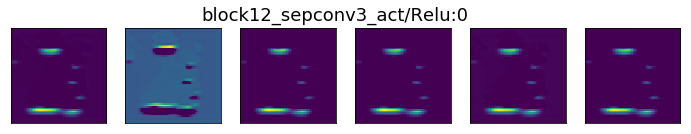

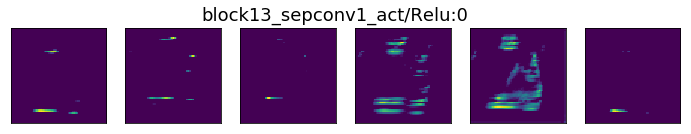

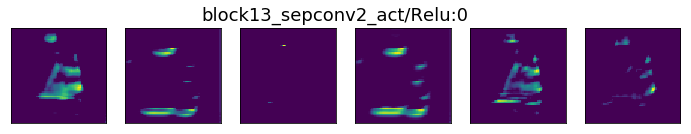

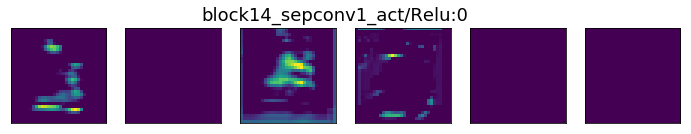

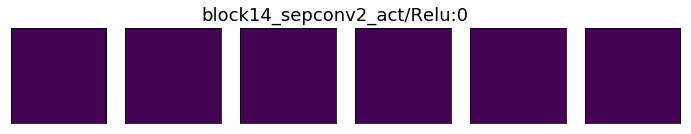

In [10]:
num_to_show = 6

# test image
plt.imshow(image)

for name in layer_names:
    vmax, vmin = 0, 255
    layer_weights = []
    
    # randomly selecting weights from layer
    for n in np.random.random_integers(0,activation_map[name].shape[3]-1,num_to_show):
        layer_weights.append(activation_map[name][0,:,:,n])
    
    # building figure to populate with weight plots
    fig, axes = plt.subplots(nrows=1,
                        ncols=num_to_show,
                        figsize=(12,2),
                        subplot_kw={'xticks': [],
                                    'yticks': []})
    fig.suptitle(name, fontsize=18)
    
    # applying normalization
    vmin, vmax = np.amin(layer_weights), np.amax(layer_weights)
    norm = colors.Normalize(vmin=vmin,vmax=vmax)
    
    for ax, weights in zip(axes,layer_weights):
        ax.imshow(norm(weights))
        
plt.show()

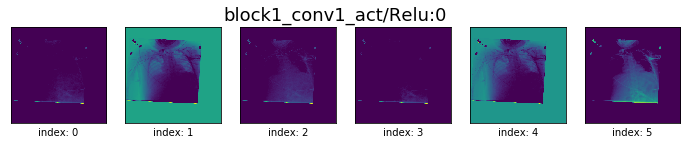

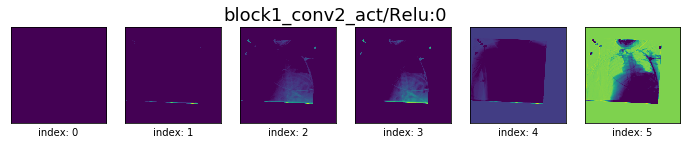

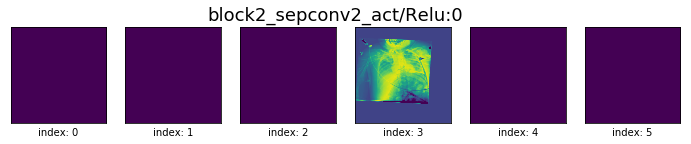

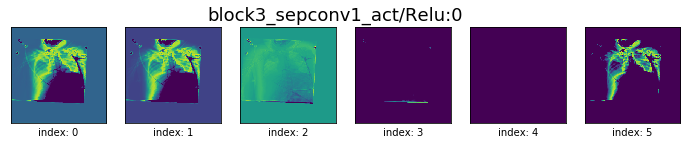

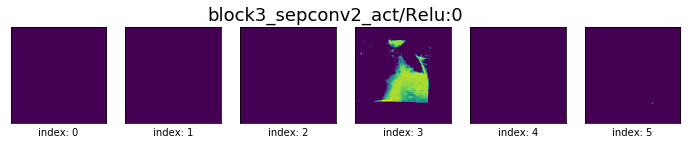

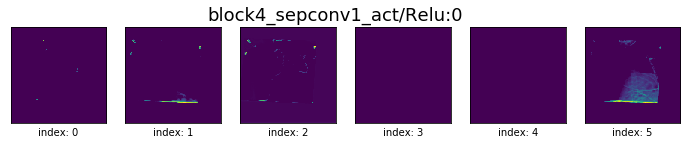

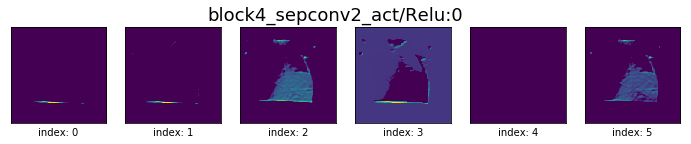

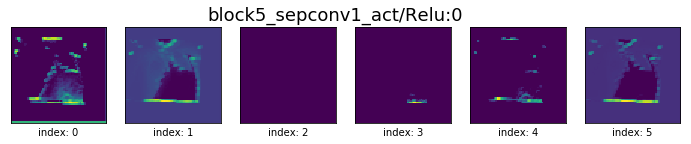

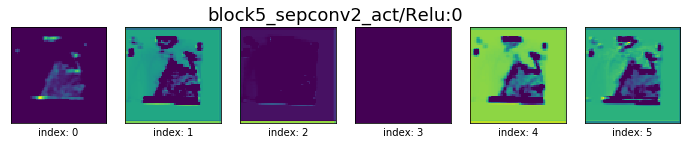

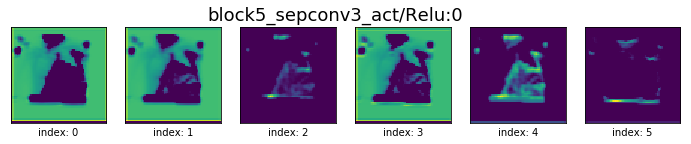

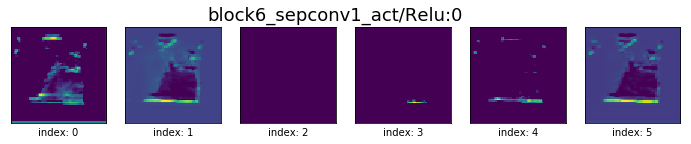

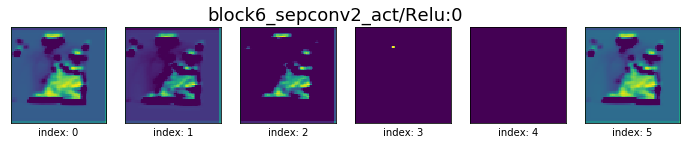

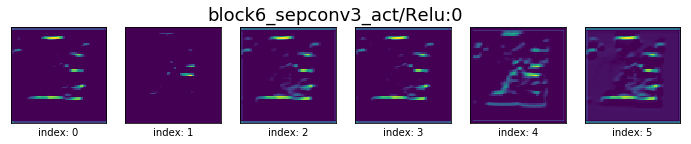

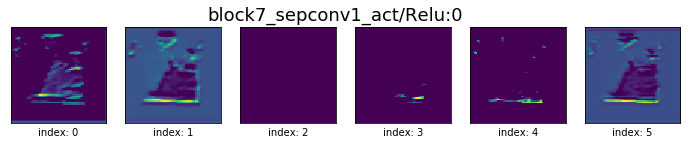

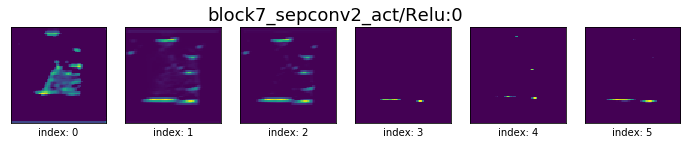

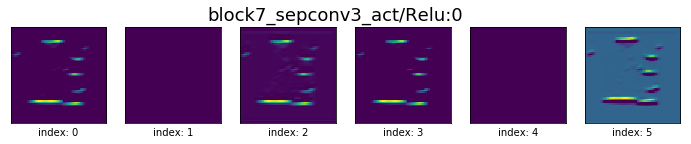

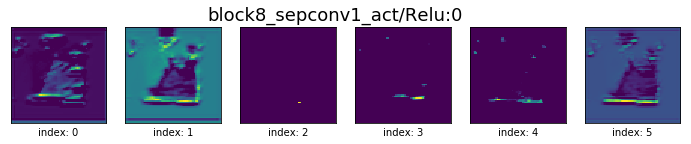

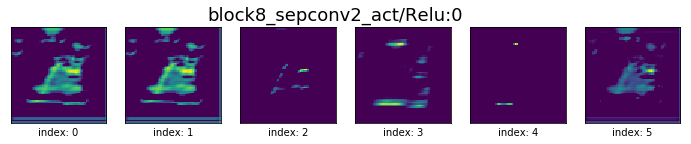

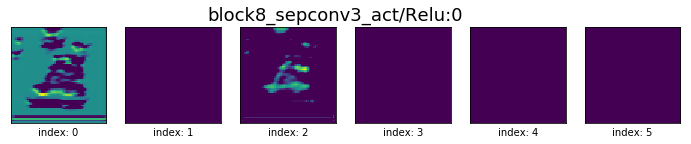

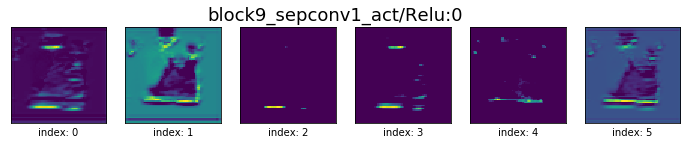

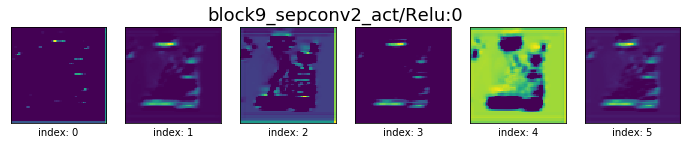

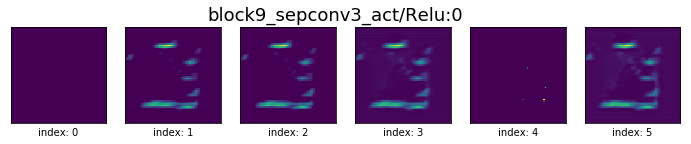

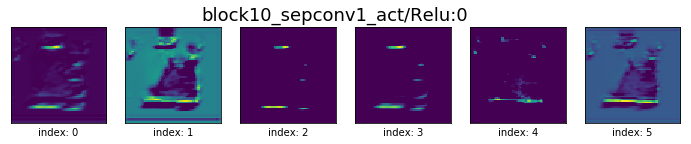

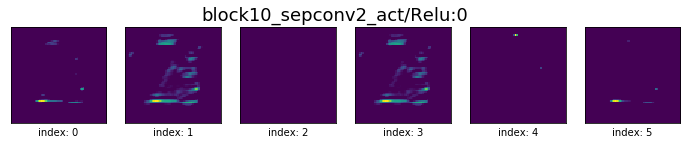

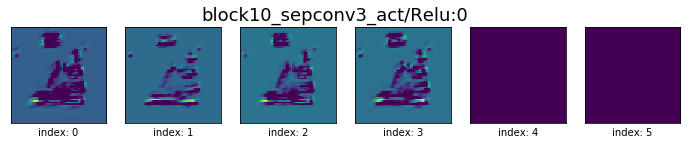

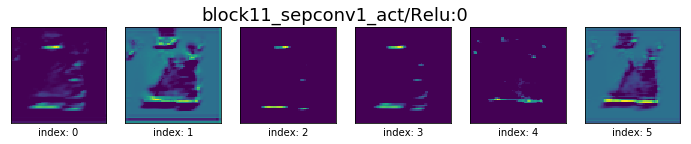

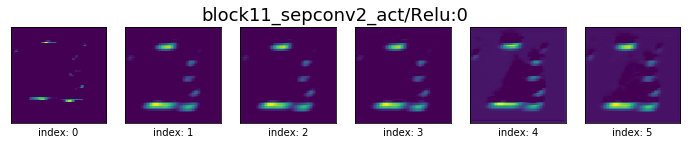

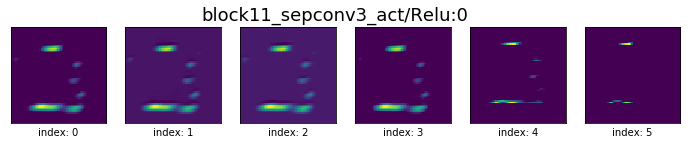

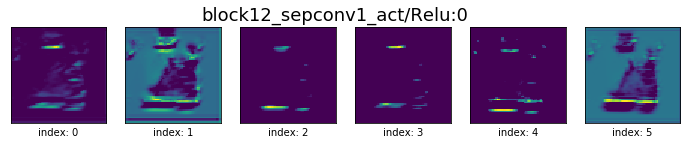

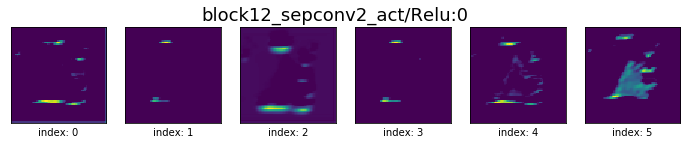

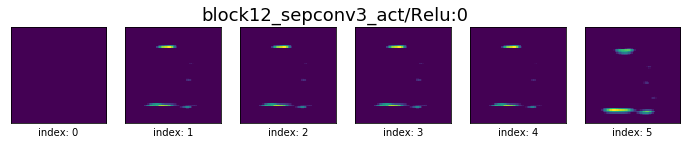

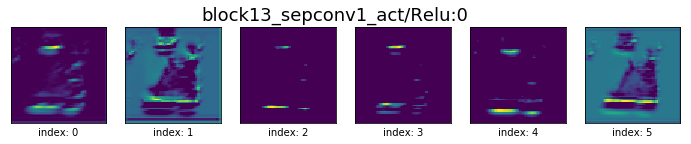

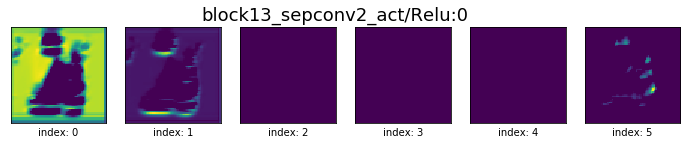

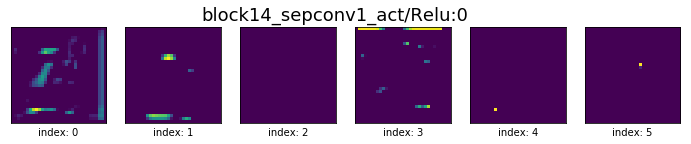

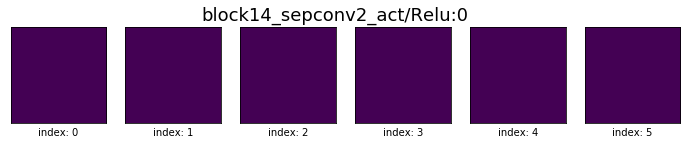

In [11]:
for name in layer_names:
    fig, axes = plt.subplots(nrows=1,
                        ncols=6,
                        figsize=(12,2),
                        subplot_kw={'xticks': [],
                                    'yticks': []})
    fig.suptitle(name, fontsize=18)
    for ax, n in zip(axes,range(0,6)):
        #n = np.random.randint(0,activation_map[name].shape[3])
        ax.imshow(activation_map[name][0,:,:,n])
        ax.set_xlabel('index: {0}'.format(n))
        
plt.show()

In [ ]:
plt.imshow(activation_map['block10_sepconv2_act/Relu:0'][0,:,:,0])

In [ ]:
print("Evaluating model...")
scores = model.evaluate_generator(test_generator,verbose=1)
print(scores)

In [ ]:
for guy in activation_map:
    for n in range(0, np.array(activation_map[guy]).shape[-1]):
       
        if len(activation_map[guy].shape) < 4: pass
        else:
            plt.imshow(activation_map[guy][0,:,:,n])
            plt.show()